In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
small = "./datasets/github_dataset.csv"
large = "./datasets/repository_data.csv"

# large_df = pd.read_csv(large)
# large_df.head()

In [30]:
df = pd.read_csv(small)
df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [31]:
df.isnull().sum()[df.isnull().sum()>0]

language    145
dtype: int64

In [32]:
df['language'].unique()

array([nan, 'C++', 'Python', 'Ruby', 'Java', 'CSS', 'Jinja', 'Dart',
       'JavaScript', 'HTML', 'Objective-C', 'Kotlin', 'AutoHotkey', 'Go',
       'Haskell', 'SCSS', 'Jupyter Notebook', 'Vue', 'Shell', 'Rust',
       'PowerShell', 'C', 'C#', 'TypeScript', 'Svelte', 'Less', 'QML',
       'CoffeeScript', 'Swift', 'Hack', 'PHP', 'Smarty', 'Solidity',
       'Dockerfile', 'PureBasic', 'Vim Script', 'R', 'HCL', 'Perl',
       'Makefile', 'Roff', 'ActionScript', 'CodeQL', 'Elixir', 'Oz',
       'CMake', 'Assembly', 'Pawn', 'Gherkin', 'QMake', 'Cuda',
       'SourcePawn'], dtype=object)

In [33]:
df['language'].fillna("Unknown", inplace=True)

In [34]:
df['language'].unique()

array(['Unknown', 'C++', 'Python', 'Ruby', 'Java', 'CSS', 'Jinja', 'Dart',
       'JavaScript', 'HTML', 'Objective-C', 'Kotlin', 'AutoHotkey', 'Go',
       'Haskell', 'SCSS', 'Jupyter Notebook', 'Vue', 'Shell', 'Rust',
       'PowerShell', 'C', 'C#', 'TypeScript', 'Svelte', 'Less', 'QML',
       'CoffeeScript', 'Swift', 'Hack', 'PHP', 'Smarty', 'Solidity',
       'Dockerfile', 'PureBasic', 'Vim Script', 'R', 'HCL', 'Perl',
       'Makefile', 'Roff', 'ActionScript', 'CodeQL', 'Elixir', 'Oz',
       'CMake', 'Assembly', 'Pawn', 'Gherkin', 'QMake', 'Cuda',
       'SourcePawn'], dtype=object)

In [35]:
df.dtypes.sort_values()

stars_count       int64
forks_count       int64
issues_count      int64
pull_requests     int64
contributors      int64
repositories     object
language         object
dtype: object

In [36]:
df.describe()

,stars_count,forks_count,issues_count,pull_requests,contributors
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,81.976236,53.884981,8.656844,4.374525,8.364068
std,170.403116,127.699729,32.445154,27.913732,37.511807
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,6.000000,2.000000,0.000000,2.000000
75%,65.250000,38.250000,6.000000,2.000000,4.000000
max,995.000000,973.000000,612.000000,567.000000,658.000000


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
# repo of {language} sorted by {stars/forks/issues/pull/contributors} in ascending/descending
def search_by_lang(df, lang, sorted_key, ascending=True):
    result = df.sort_values(sorted_key, ascending=ascending)
    result = result[['repositories', sorted_key, 'language']]
    result = result[result['language']==lang]
    if result.shape[0] < 10:
        return result
    else:
        return result.head(10)

In [39]:
sort_by_forks = search_by_lang(df, 'C++', 'forks_count', False)
sort_by_forks

,repositories,forks_count,language
62,loveBabbar/CodeHelp-DSA-Busted-Series,913,C++
509,Errichto/youtube,486,C++
91,LiveOverflow/PwnAdventure3,124,C++
286,garimasingh128/CP-DSA-Cpp-C,89,C++
530,nayyyhaa/C-codes,32,C++
264,trailofbits/AppJailLauncher,19,C++
591,LiveOverflow/NECAnalyzer,17,C++
952,trailofbits/cfg-showcase,12,C++
425,trailofbits/constexpr-everything,11,C++
948,education/autograding-example-cpp,9,C++


In [40]:
sort_by_stars = search_by_lang(df, 'Python', 'stars_count', False)
sort_by_stars

,repositories,stars_count,language
21,brettkromkamp/contextualise,960,Python
267,donnemartin/viz,759,Python
268,localstack/awscli-local,702,Python
284,byt3bl33d3r/ItWasAllADream,692,Python
92,ethereum/casper,681,Python
112,ethereum/btcrelay,564,Python
90,rupa/epub,360,Python
131,google/active-qa,339,Python
43,sagesharp/foss-heartbeat,297,Python
89,kdeldycke/meta-package-manager,272,Python


In [41]:
df

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,Unknown
1,EddieHubCommunity/support,271,150,536,6,71,Unknown
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


{'whiskers': [<matplotlib.lines.Line2D at 0x7f91ad80dc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91ad816650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91ad5d4b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91ad81e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91ad81e5d0>],
 'means': []}

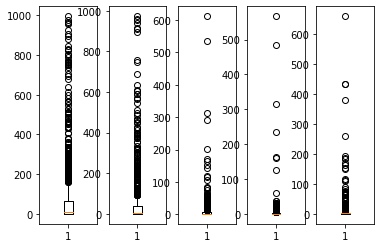

In [42]:
stars = df['stars_count']
forks = df['forks_count']
issues = df['issues_count']
pulls = df['pull_requests']
contributors = df['contributors']
fig, ax = plt.subplots(1, 5)
ax[0].boxplot(stars)
ax[1].boxplot(forks)
ax[2].boxplot(issues)
ax[3].boxplot(pulls)
ax[4].boxplot(contributors)

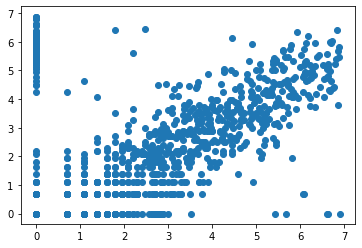

In [43]:
plt.scatter(np.log(stars+1), np.log(forks+1))
# most are positive related

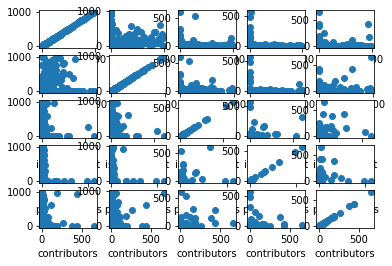

In [44]:
# relateness between pairs of integer features
stars = df['stars_count']
forks = df['forks_count']
issues = df['issues_count']
pulls = df['pull_requests']
contributors = df['contributors']
choices = [stars, forks, issues, pulls, contributors]
fig, axs = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        axs[i, j].scatter(choices[i], choices[j])
        axs[i, j].set(xlabel=choices[i].name)

In [45]:
def search_by_keyword(df, keyword):
    def filter(name):
        if keyword.lower() in name.lower():
            return name
        else:
            return None
    
    result = df.copy()
    result['repositories'] = result['repositories'].apply(filter)
    result.dropna(inplace=True)
    return result

In [46]:
r1 = search_by_keyword(df, 'python')
r1.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
51,garimasingh128/awesome-python-projects,440,127,27,14,30,Jupyter Notebook
129,anshrathod/Basic-Python-Scripts,18,93,13,1,112,Python
160,donnemartin/data-science-ipython-notebooks,0,0,11,13,12,Python
375,sagesharp/python-code-of-conduct,2,103,4,0,0,Unknown
424,PragneshRamani/Coursera---Using-Python-to-Acce...,37,79,3,6,0,Python


In [47]:
df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,Unknown
1,EddieHubCommunity/support,271,150,536,6,71,Unknown
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [50]:
def draw_violinplot(df, x, langs):
    result = df.copy()
    result = result[result['language'].isin(langs)]
    sns.boxplot(data=result, x=x, y="language")

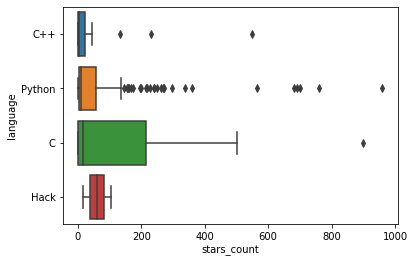

In [51]:
draw_violinplot(df, "stars_count", ["Python", "C++", "C", "Hack"])

In [87]:
# draw pie chart
def draw_piechart(df):
    lang_serires = df['language'].copy()
    cnts = lang_serires.where(lang_serires!='Unknown').dropna().value_counts()
    langs = np.array(cnts.index)
    cnts = np.array(cnts)
    other_cnts = np.sum(cnts[5:])
    cnts = np.array([cnts[0], cnts[1], cnts[2], cnts[3], cnts[4], other_cnts])
    cnts = cnts / np.sum(cnts) * 100
    langs = np.array([langs[0], langs[1], langs[2], langs[3], langs[4], "other"])
    fig_pie, ax_pie = plt.subplots()
    ax_pie.pie(cnts, labels=langs, autopct="%1.1f%%")